In [ ]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import plotly.graph_objs as go
from plotly.subplots import make_subplots

test = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/test.csv')
train = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/train.csv')
sub = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/원본/sample_submission.csv')
holiday = pd.read_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/16_22공휴일.csv')

In [ ]:
train.shape, test.shape, sub.shape

((1205, 12), (50, 10), (50, 3))

In [ ]:
train.head(3) #2016-02-01~2021-01-26까지 5년정도 데이터가 있음

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
test.head(3) #2021-01-27~21-04-09 까지의 중식, 석식계 데이터

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [ ]:
holiday.head(3)

,날짜,년도,월,일,요일,공휴일
0,2016.1.1,2016,1,1,금,신정(양력설)
1,2016.2.7,2016,2,7,일,설날 연휴
2,2016.2.8,2016,2,8,월,설날


In [ ]:
sub.tail(3) #2021-01-27~21-04-09

,일자,중식계,석식계
47,2021-04-07,0,0
48,2021-04-08,0,0
49,2021-04-09,0,0


##Train 데이터 셋 탐구

In [ ]:
summary = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
summary = summary.reset_index()
summary = summary.rename(columns={'index':'피쳐'})
summary['결측값 개수'] = train.isnull().sum().values
summary['고유값 개수'] = train.nunique().values
summary['첫번째 값'] = train.loc[0].values
summary['두번째 값'] = train.loc[1].values
summary

,피쳐,데이터 타입,결측값 개수,고유값 개수,첫번째 값,두번째 값
0,일자,object,0,1205,2016-02-01,2016-02-02
1,요일,object,0,5,월,화
2,본사정원수,int64,0,53,2601,2601
3,본사휴가자수,int64,0,347,50,50
4,본사출장자수,int64,0,194,150,173
5,본사시간외근무명령서승인건수,int64,0,507,238,319
6,현본사소속재택근무자수,float64,0,165,0.0,0.0
7,조식메뉴,object,0,1204,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...
8,중식메뉴,object,0,1198,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무..."
9,석식메뉴,object,0,1168,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무..."


In [ ]:
#현장근무자 수 추가 
#출장이 하루인지, 반나절인지 알 수 없으나 1차적으로 일단 제외시켜주겠음
train['본사근무자수']=train['본사정원수']-train['본사휴가자수']-train['본사출장자수']-train['현본사소속재택근무자수']

In [ ]:
#일자별 파생변수 추가
train['일자'] = pd.to_datetime(train['일자'])
train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week

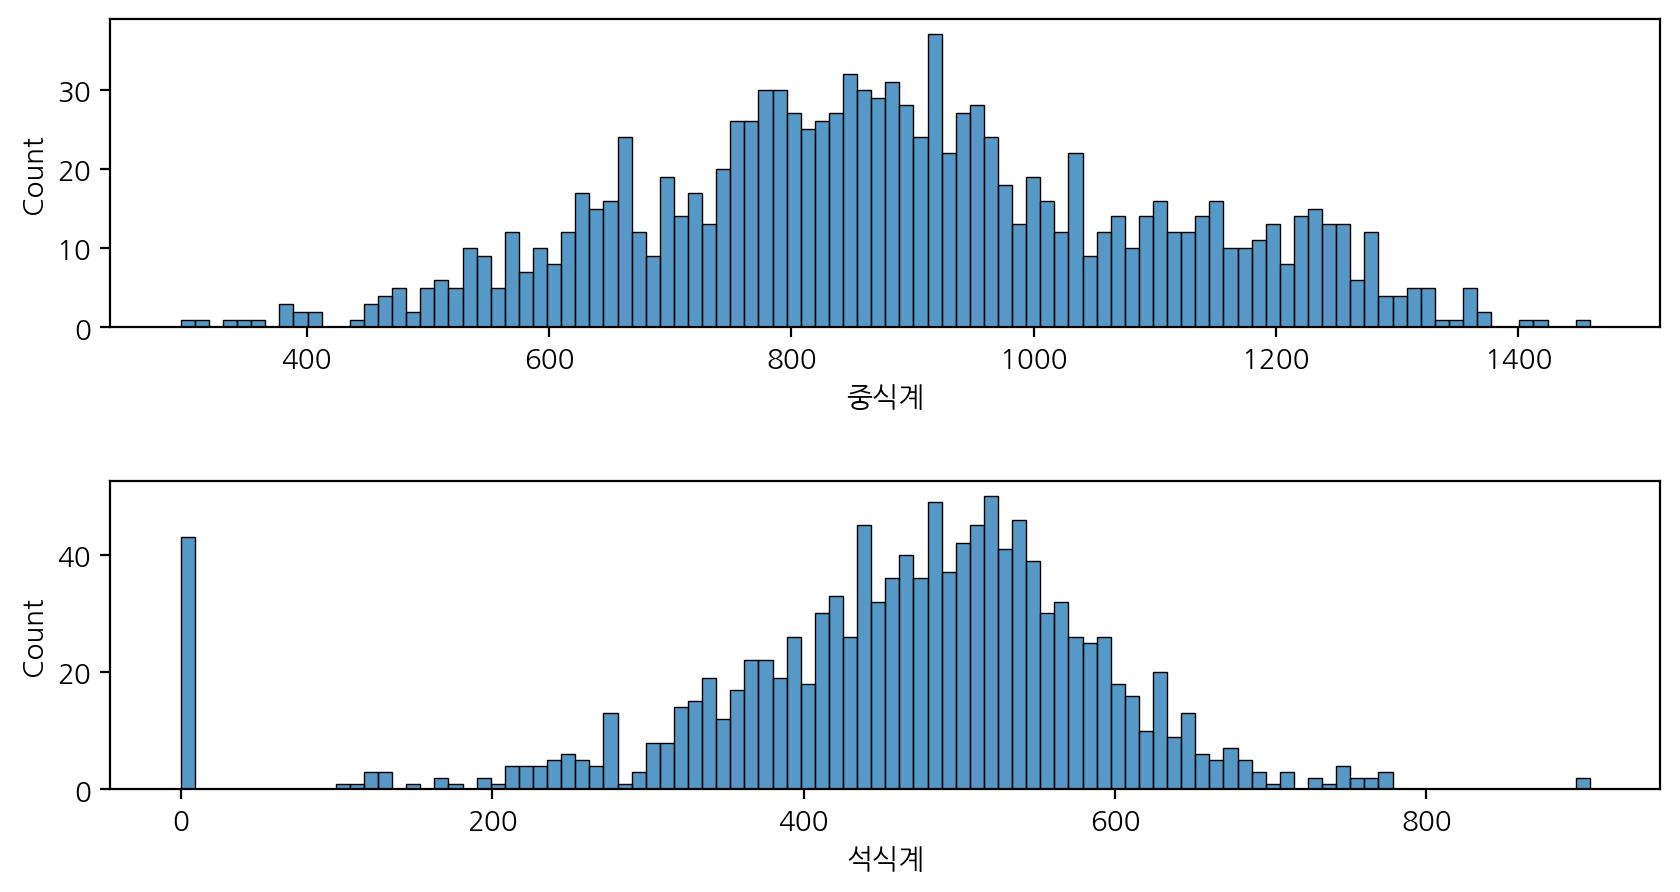

In [25]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
sns.histplot(train['중식계'], ax=axes[0], bins=100)
sns.histplot(train['석식계'], ax=axes[1], bins=100)
plt.subplots_adjust(hspace=0.5, wspace=0.5) #간격

In [225]:
#전반적으로 중식계는 비교적 수치값이 일정하나, 석식이 Q1 이하인 경우가 많다
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box(y=train['중식계'], name='중식계'), row=1, col=1)
fig.add_trace(go.Box(y=train['석식계'], name='석식계'), row=1, col=2)

In [243]:
def outlier(train, column):
    median = train[column].median()
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr #1443.0
    lower_bound = q1 - 1.5 * iqr #347.0
    return train[(train[column] > upper_bound) | (train[column] < lower_bound)]

In [244]:
outlier(train, '중식계')

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주
469,2017-12-28,목,2665,240,260,55,0.0,모닝롤/치즈프레즐 우유/주스 스크램블에그 견과류죽/쌀밥 (쌀:국내산) 피바지락국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱된장국 돼지갈비찜 콩나물겨자채 참나물무침 포기...,쌀밥/잡곡밥 (쌀:국내산) 옛날왕돈까스 크림스프 감자범벅/오이피클 과일샐러드 ...,311.0,245.0,2165.0,2017,12,28,52
705,2018-12-24,월,2846,894,159,26,0.0,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물김치국...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 훈제오리구이 매운어묵볶음 쌈무/부추생채 ...,쌀밥/잡곡밥 (쌀:국내산) 민물새우찌개 닭갈비 버섯잡채 오이무침 포기김치 (...,296.0,104.0,1793.0,2018,12,24,52
709,2018-12-31,월,2846,1085,132,28,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 된장찌개 단배추...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 돈육고추장불고기 (돼지고기:국내산) 감자채볶음...,쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국 훈제오리볶음 계란찜 참나물생채 포기김...,332.0,135.0,1629.0,2018,12,31,1
735,2019-02-11,월,2806,67,159,758,0.0,모닝롤/초코핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 콩나물국 두...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 소불고기 (소고기:호주산) 계란말이 실곤약초무...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 닭볶음탕 (닭:국내산) 부추호박전 오이사과생...,1459.0,772.0,2580.0,2019,2,11,7


In [245]:
outlier(train, '석식계')

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주
163,2016-10-04,화,2670,59,239,1035,0.0,모닝롤/후르츠팬케익 우유/주스 구운계란 견과류죽/쌀밥 (쌀:국내산) 북어채국 김...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 버섯불고기 (쇠고기:호주산) 골뱅이소면무침 ...,쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개 (돼지고기:국내산) 닭볶음 (닭고기:국내산) ...,1262.0,902.0,2372.0,2016,10,4,40
164,2016-10-05,수,2670,41,228,0,0.0,모닝롤/참치샌드 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 어묵국 감자...,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 (쇠고기:호주산) 매운주꾸미볶음 모둠소세지...,"쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 미니함박조림 (쇠고기:호주산,돈육:국내산) ...",1336.0,905.0,2401.0,2016,10,5,40
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2414.0,2016,11,30,48
224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2314.0,2016,12,28,52
244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0,2017,1,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1038,2020-05-04,월,2962,1113,117,91,189.0,모닝롤/애플파이 우유/주스 계란후라이 누룽지탕/쌀밥 바나나베이비샐러드 소고기무우국...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 버섯들깨국 삼겹살더덕고추장구이 곰취,명이나...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 다슬기아욱국 갈릭파닭 돈채호박볶음 짠지오...",504.0,123.0,1543.0,2020,5,4,19
1129,2020-09-28,월,3132,985,188,81,142.0,모닝롤/애플파이 우유/주스 계란후라이 누룽지탕/흑미밥 유부김칫국 베이컨숙주볶음 양상...,쌀밥/흑미밥/찰현미밥 떡만두국 오리대패불고기 꽁치캔김치조림 파프리카해초무침 포기김치...,흑미밥 우거지된장국 닭볶음탕 섭산적데리야끼조림 콩나물무침 포기김치,358.0,165.0,1817.0,2020,9,28,40
1166,2020-11-25,수,3021,206,191,3,387.0,모닝롤/베이글 우유/주스 계란후라이 녹두죽/흑미밥 아귀지리탕 돈사태찜 양상추샐러드 ...,쌀밥/흑미밥/찰현미밥 콩비지김치찌개 해물누룽지탕 탕평채 고추장감자조림 깍두기/수제과...,＜자기 계발의 날＞,1146.0,0.0,2237.0,2020,11,25,48
1173,2020-12-04,금,2990,427,233,3,292.0,모닝롤/모닝샌드위치 우유/주스 계란후라이 새알팥죽/흑미밥 시금치고추장국 야채소시지전...,쌀밥/흑미밥/찰현미밥 육개장 (New)교촌윙 갈치감자조림 톳두부무침 포기김치 양상추...,흑미밥 얼갈이된장국 낙지볶음*소면 노가리고추조림 미나리전 겉절이김치,858.0,197.0,2038.0,2020,12,4,49


In [ ]:
median = train['석식계'].median()
q1 = train['중식계'].quantile(0.25)
q3 = train['중식계'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr #1443.0
lower_bound = q1 - 1.5 * iqr #347.0

In [216]:
#석식계가 0인 행은 석식메뉴가 대부분 없음
dinner_eda = train[train['석식계'] ==0]
dinner_eda = dinner_eda.reset_index()
dinner_eda.head(3)

,index,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주
0,204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,*,1109.0,0.0,2414.0,2016,11,30,48
1,224,2016-12-28,수,2705,166,225,0,0.0,모닝롤/고구마파이 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 북어계란국 ...,콩나물밥 (쌀:국내산) 가쯔오장국 미트볼케찹조림 꽃맛살샐러드 군고구마 배추겉...,*,767.0,0.0,2314.0,2016,12,28,52
2,244,2017-01-25,수,2697,79,203,0,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 두부젓국찌개 ...,카레덮밥 (쌀:국내산) 맑은국 유린기 개성감자만두 오이사과무침 포기김치 (김...,*,720.0,0.0,2415.0,2017,1,25,4


<Axes: xlabel='요일', ylabel='count'>

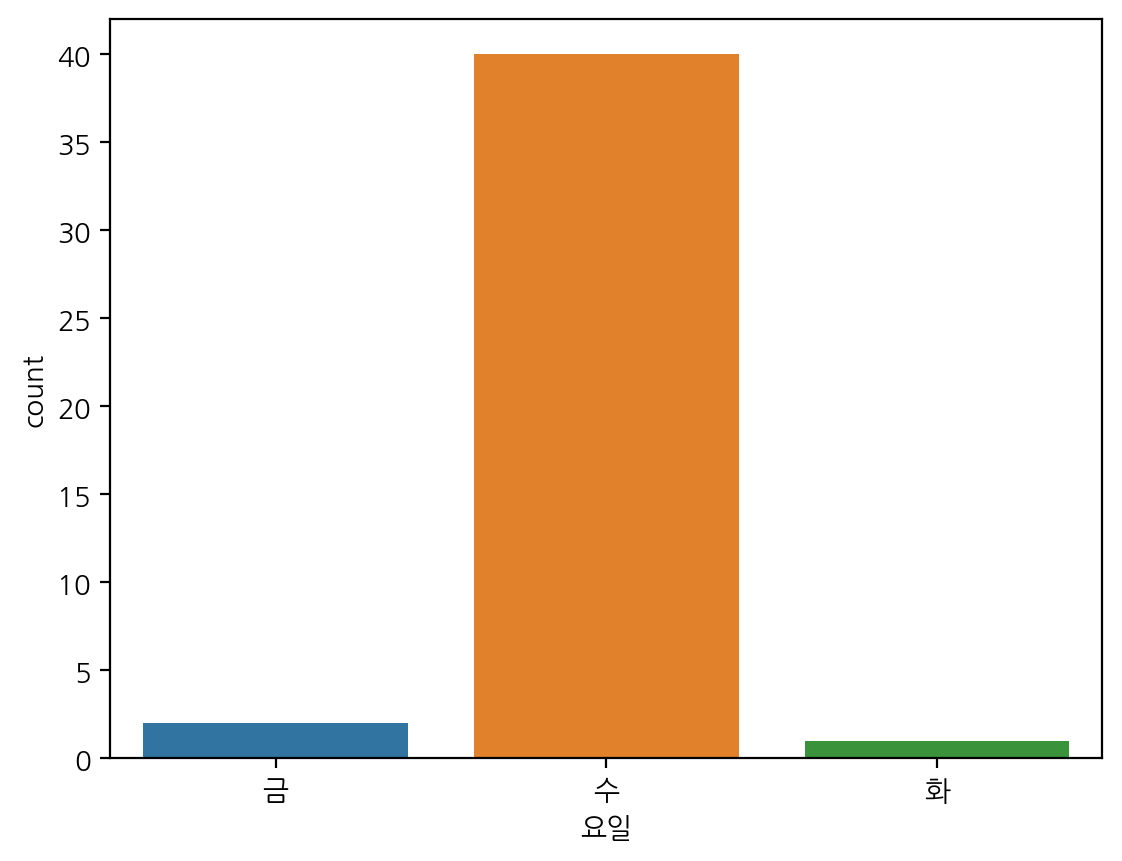

In [174]:
#석식계가 0인 날은 문화의 날인 수요일이 압도적으로 많음
dinner_eda_count = dinner_eda.groupby('요일')['index'].nunique().reset_index(name='count')
sns.barplot(data=dinner_eda_count, x='요일', y='count')

In [212]:
#수요일날 중식, 석식계에 영향을 준 날은 정확하게 언제인지 확인해보자 
weds = train[(train['요일']=='수')].reset_index()
pivot_table = weds.pivot_table(index='년', columns='주', values='석식계', fill_value=0)
pivot_table.T.style.background_gradient()

년,2016,2017,2018,2019,2020,2021
주,,,,,,
1,0,427,441,407,0,377
2,0,514,423,335,321,360
3,0,394,466,356,350,421
4,0,0,274,392,354,0
5,573,566,0,0,0,0
6,0,548,540,0,276,0
7,588,505,0,497,411,0
8,514,0,522,472,434,0
9,631,0,0,0,0,0


In [218]:
#화요일과 금요일 Case는 어떤 경우인가? -> 정확한 추측은 불가능하지만, 우선 석식메뉴가 없으면 석식계는 0으로 보면 될 듯
dinner_eda[dinner_eda['요일'].isin(['금','화'])]

,index,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주
9,392,2017-09-01,금,2642,177,303,45,0.0,모닝롤/단팥빵 우유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 대구찌개 깻순나...,쌀밥/잡곡밥 (쌀:국내산) 시래기국 훈제오리구이 두부구이*양념장 쌈무/양파절임...,*,663.0,0.0,2162.0,2017,9,1,35
11,412,2017-09-29,금,2642,214,248,22,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 김치두부국 ...,쌀밥/잡곡밥 (쌀:국내산) 미역국 쇠불고기/잡채 오징어숙회무침 미니케익/식혜 ...,*,760.0,0.0,2180.0,2017,9,29,39
39,955,2019-12-31,화,3111,709,149,22,0.0,모닝롤/야채샌드 우유/주스 스크램블에그 고구마죽/쌀밥 (쌀:국내산) 열무된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 배추된장국 닭볶음탕 (닭:국내산) 부추깻잎전 양배추쌈...,*,349.0,0.0,2253.0,2019,12,31,1


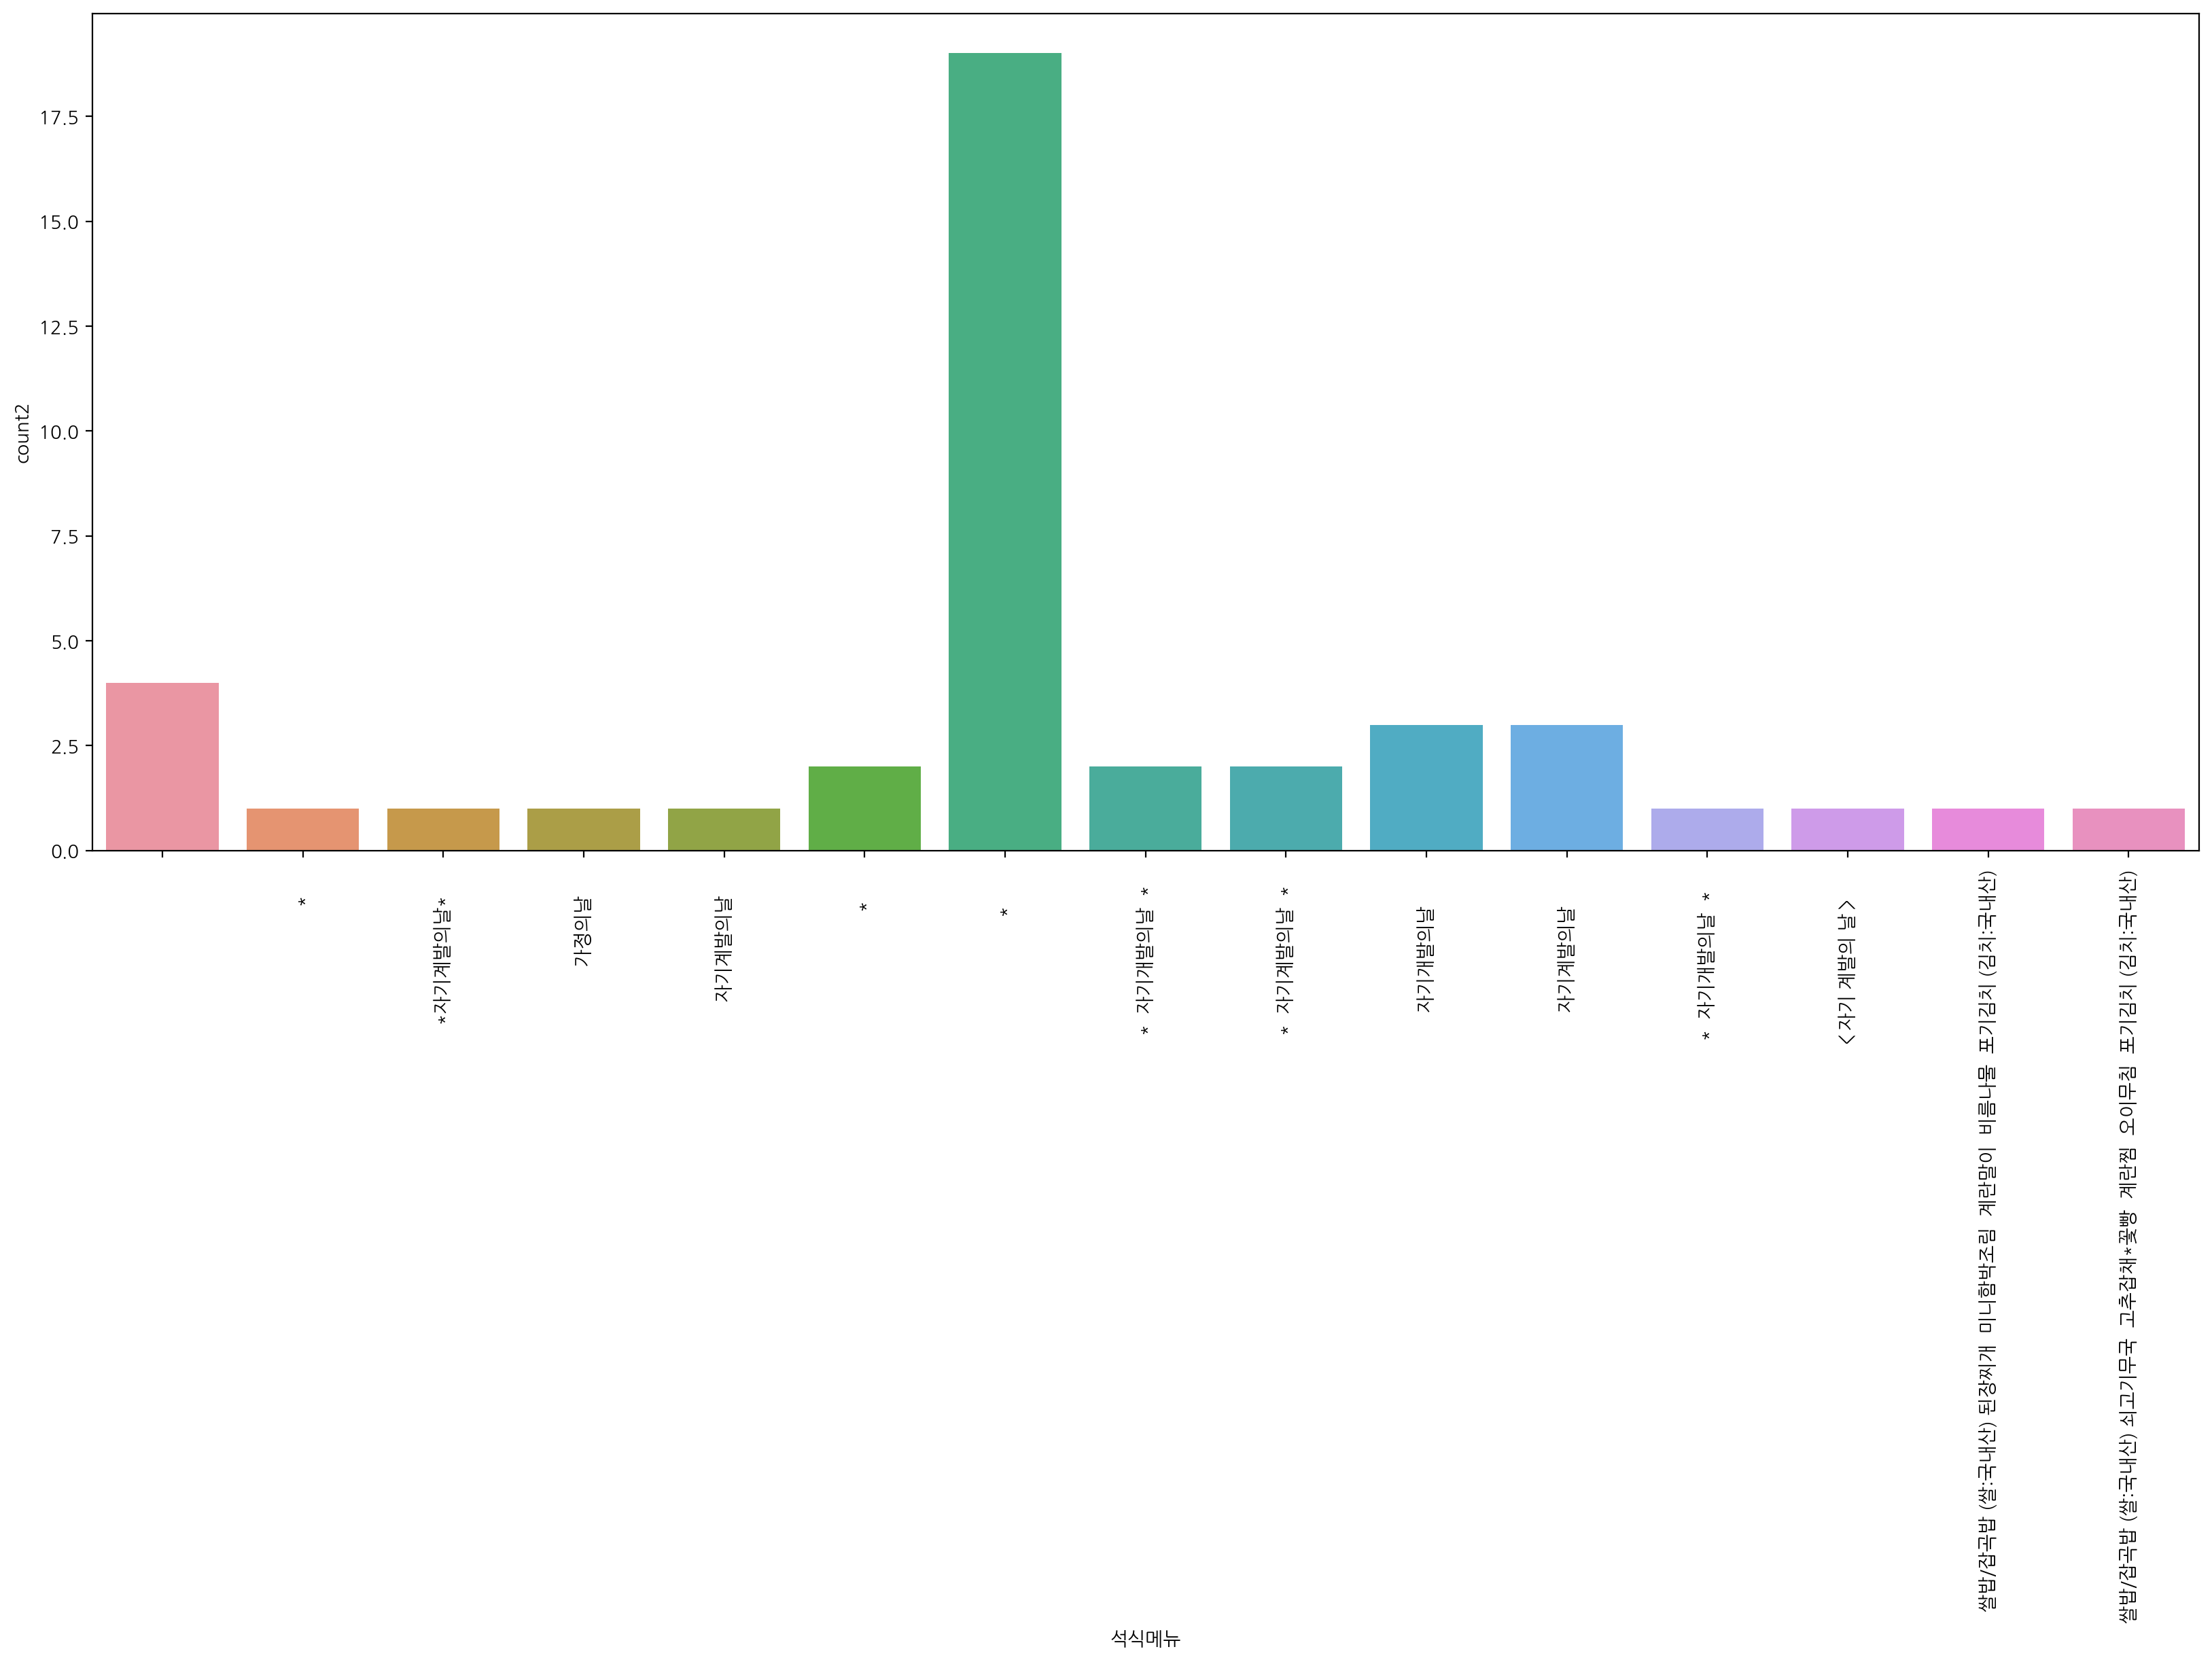

In [217]:
#석식메뉴의 분포 
#가정의날, 자기계발의 날처럼 석식메뉴가 없는 날은 석식계를 0으로 처리
dinner_eda_count2 = dinner_eda.drop_duplicates(subset=['일자', '석식메뉴']).groupby('석식메뉴')['index'].nunique().reset_index(name='count2')
plt.figure(figsize=(20,8))
sns.barplot(data=dinner_eda_count2, x='석식메뉴', y='count2')
plt.xticks(rotation=90)
plt.show()

In [219]:
#석식메뉴가 있음에도 석식계가 0인 경우는 어떤 케이스인가?
#근무자수에도 특별히 이상이 없고, 석식계 기준으로 봤을때 년간 경향성이 있는 일자가 아니라 이 부분은 석식계가 잘못 집계됬을 가능성이 있다 
#-> 모델링시 제거해줄지 여부 고민 필요
dinner_eda[dinner_eda['석식메뉴'].str.contains('쌀밥')]

,index,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주
10,410,2017-09-27,수,2642,70,265,0,0.0,모닝롤/단팥빵 우유/주스 계란후라이 크림누룽지탕/쌀밥 (쌀:국내산) 아욱국 명엽...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 삼겹살구이 어묵볶음 상추파무침 포기김치 ...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 미니함박조림 계란말이 비름나물 포기김치 ...,1023.0,0.0,2307.0,2017,9,27,39
16,502,2018-02-14,수,2707,418,159,0,0.0,모닝롤/고구마파이 우유/주스 계란후라이 땅콩죽/쌀밥 (쌀:국내산) 콩나물국 어묵...,쌀밥/잡곡밥 (쌀:국내산) 떡국 버섯불고기 오징어숙회무침 취나물 배추겉절이 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 고추잡채*꽃빵 계란찜 오이무침 포기김치...,850.0,0.0,2130.0,2018,2,14,7


In [231]:
#중식이 0인 값은 없음
#but 행 자체가 없는 날이 있음 고려 필요
lunch_eda = train[train['중식계']==0]
lunch_eda

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,본사근무자수,년,월,일,주


In [220]:
#수요일날 중식, 석식계에 영향을 준 날은 정확하게 언제인지 확인해보자 
weds = train[(train['요일']=='수')].reset_index()
pivot_table = weds.pivot_table(index='년', columns='주', values='중식계', fill_value=0)
pivot_table.T.style.background_gradient()

년,2016,2017,2018,2019,2020,2021
주,,,,,,
1,0,949,883,1201,0,1014
2,0,1039,865,778,740,913
3,0,863,969,1021,633,1093
4,0,720,845,958,782,0
5,1017,1260,1138,679,1197,0
6,0,1068,1107,0,660,0
7,916,1045,850,1044,1173,0
8,1022,1065,1087,1005,930,0
9,1127,0,786,944,1105,0


<Axes: xlabel='일자', ylabel='본사정원수'>

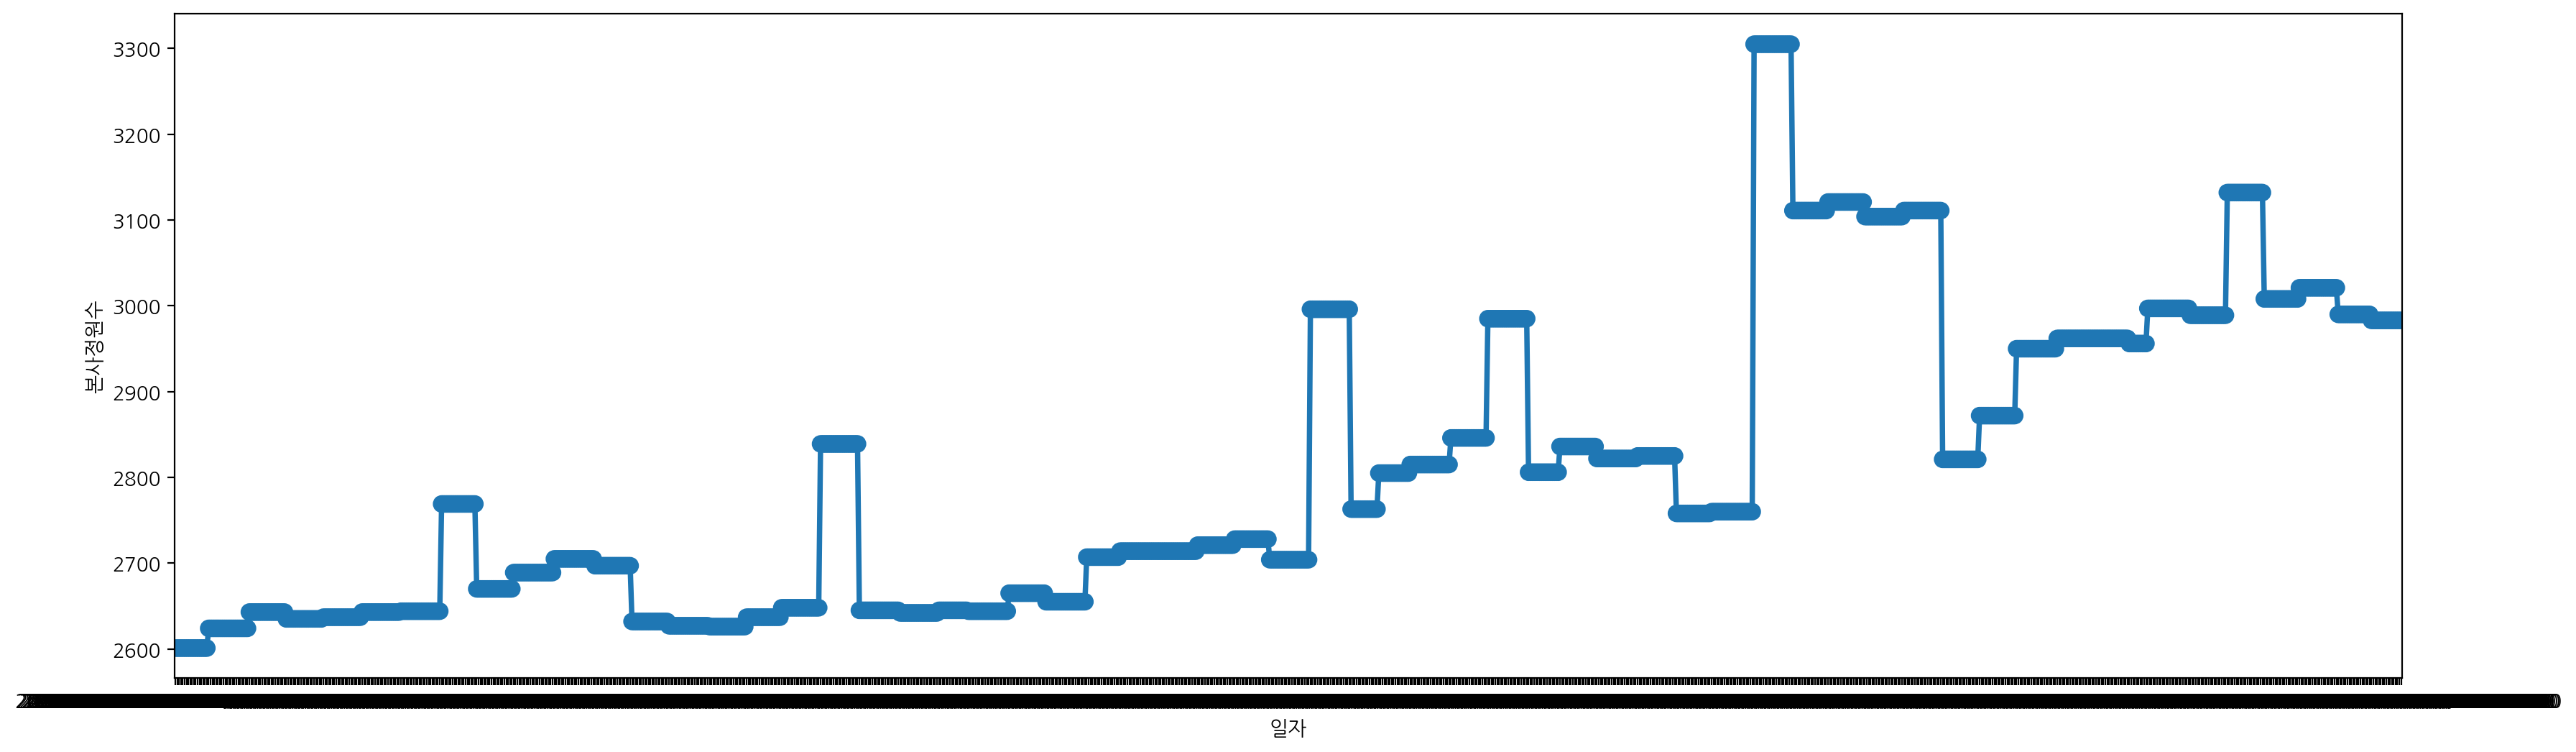

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))
sns.pointplot(x="일자", y="본사정원수", data=train, ax=ax)

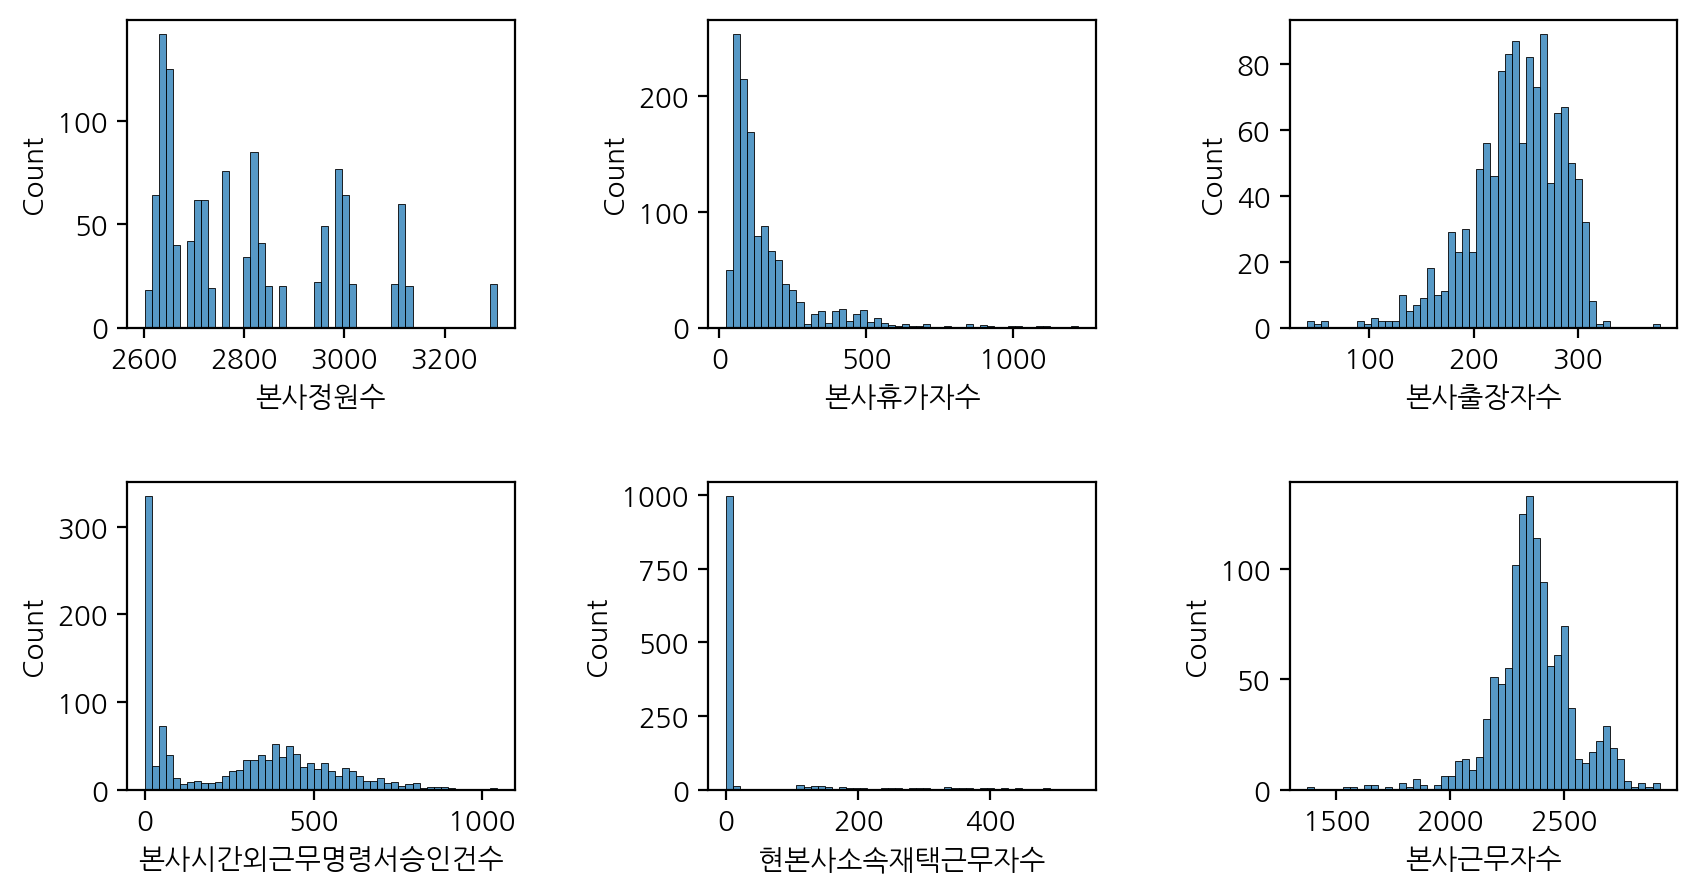

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
sns.histplot(train['본사정원수'], ax=axes[0][0], bins=50)
sns.histplot(train['본사휴가자수'], ax=axes[0][1], bins=50)
sns.histplot(train['본사출장자수'], ax=axes[0][2], bins=50)
sns.histplot(train['본사시간외근무명령서승인건수'], ax=axes[1][0], bins=50)
sns.histplot(train['현본사소속재택근무자수'], ax=axes[1][1], bins=50)
sns.histplot(train['본사근무자수'], ax=axes[1][2], bins=50)
plt.subplots_adjust(hspace=0.5, wspace=0.5) #간격

시계열 분포

ValueError: ignored

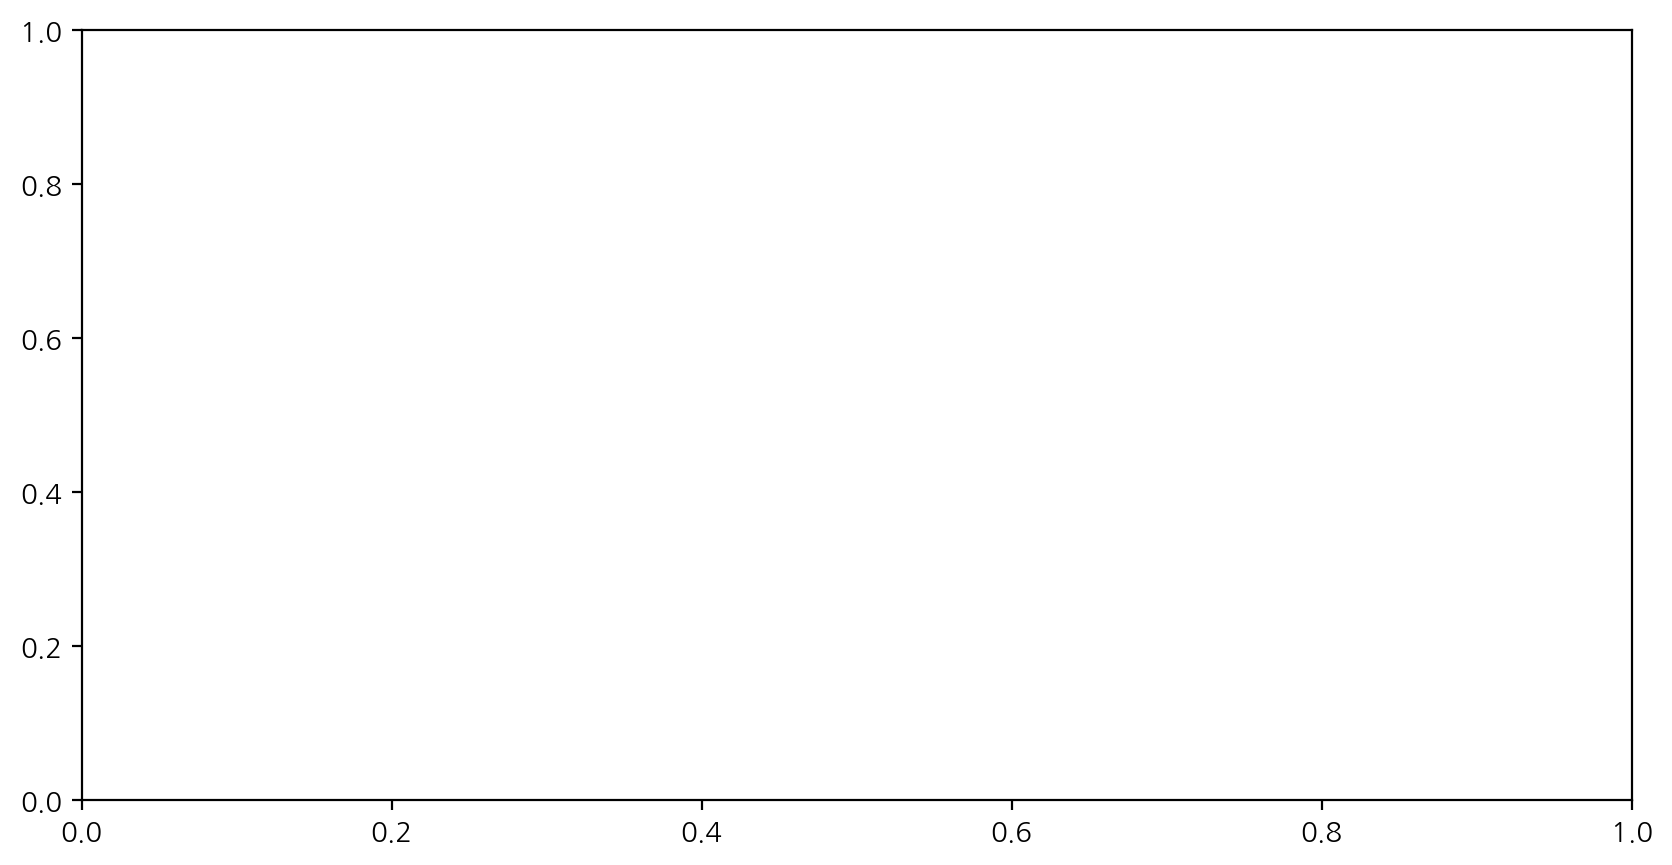

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=train, x='월', y=['중식계', '석식계'], ax=axes[0])

plt.show()


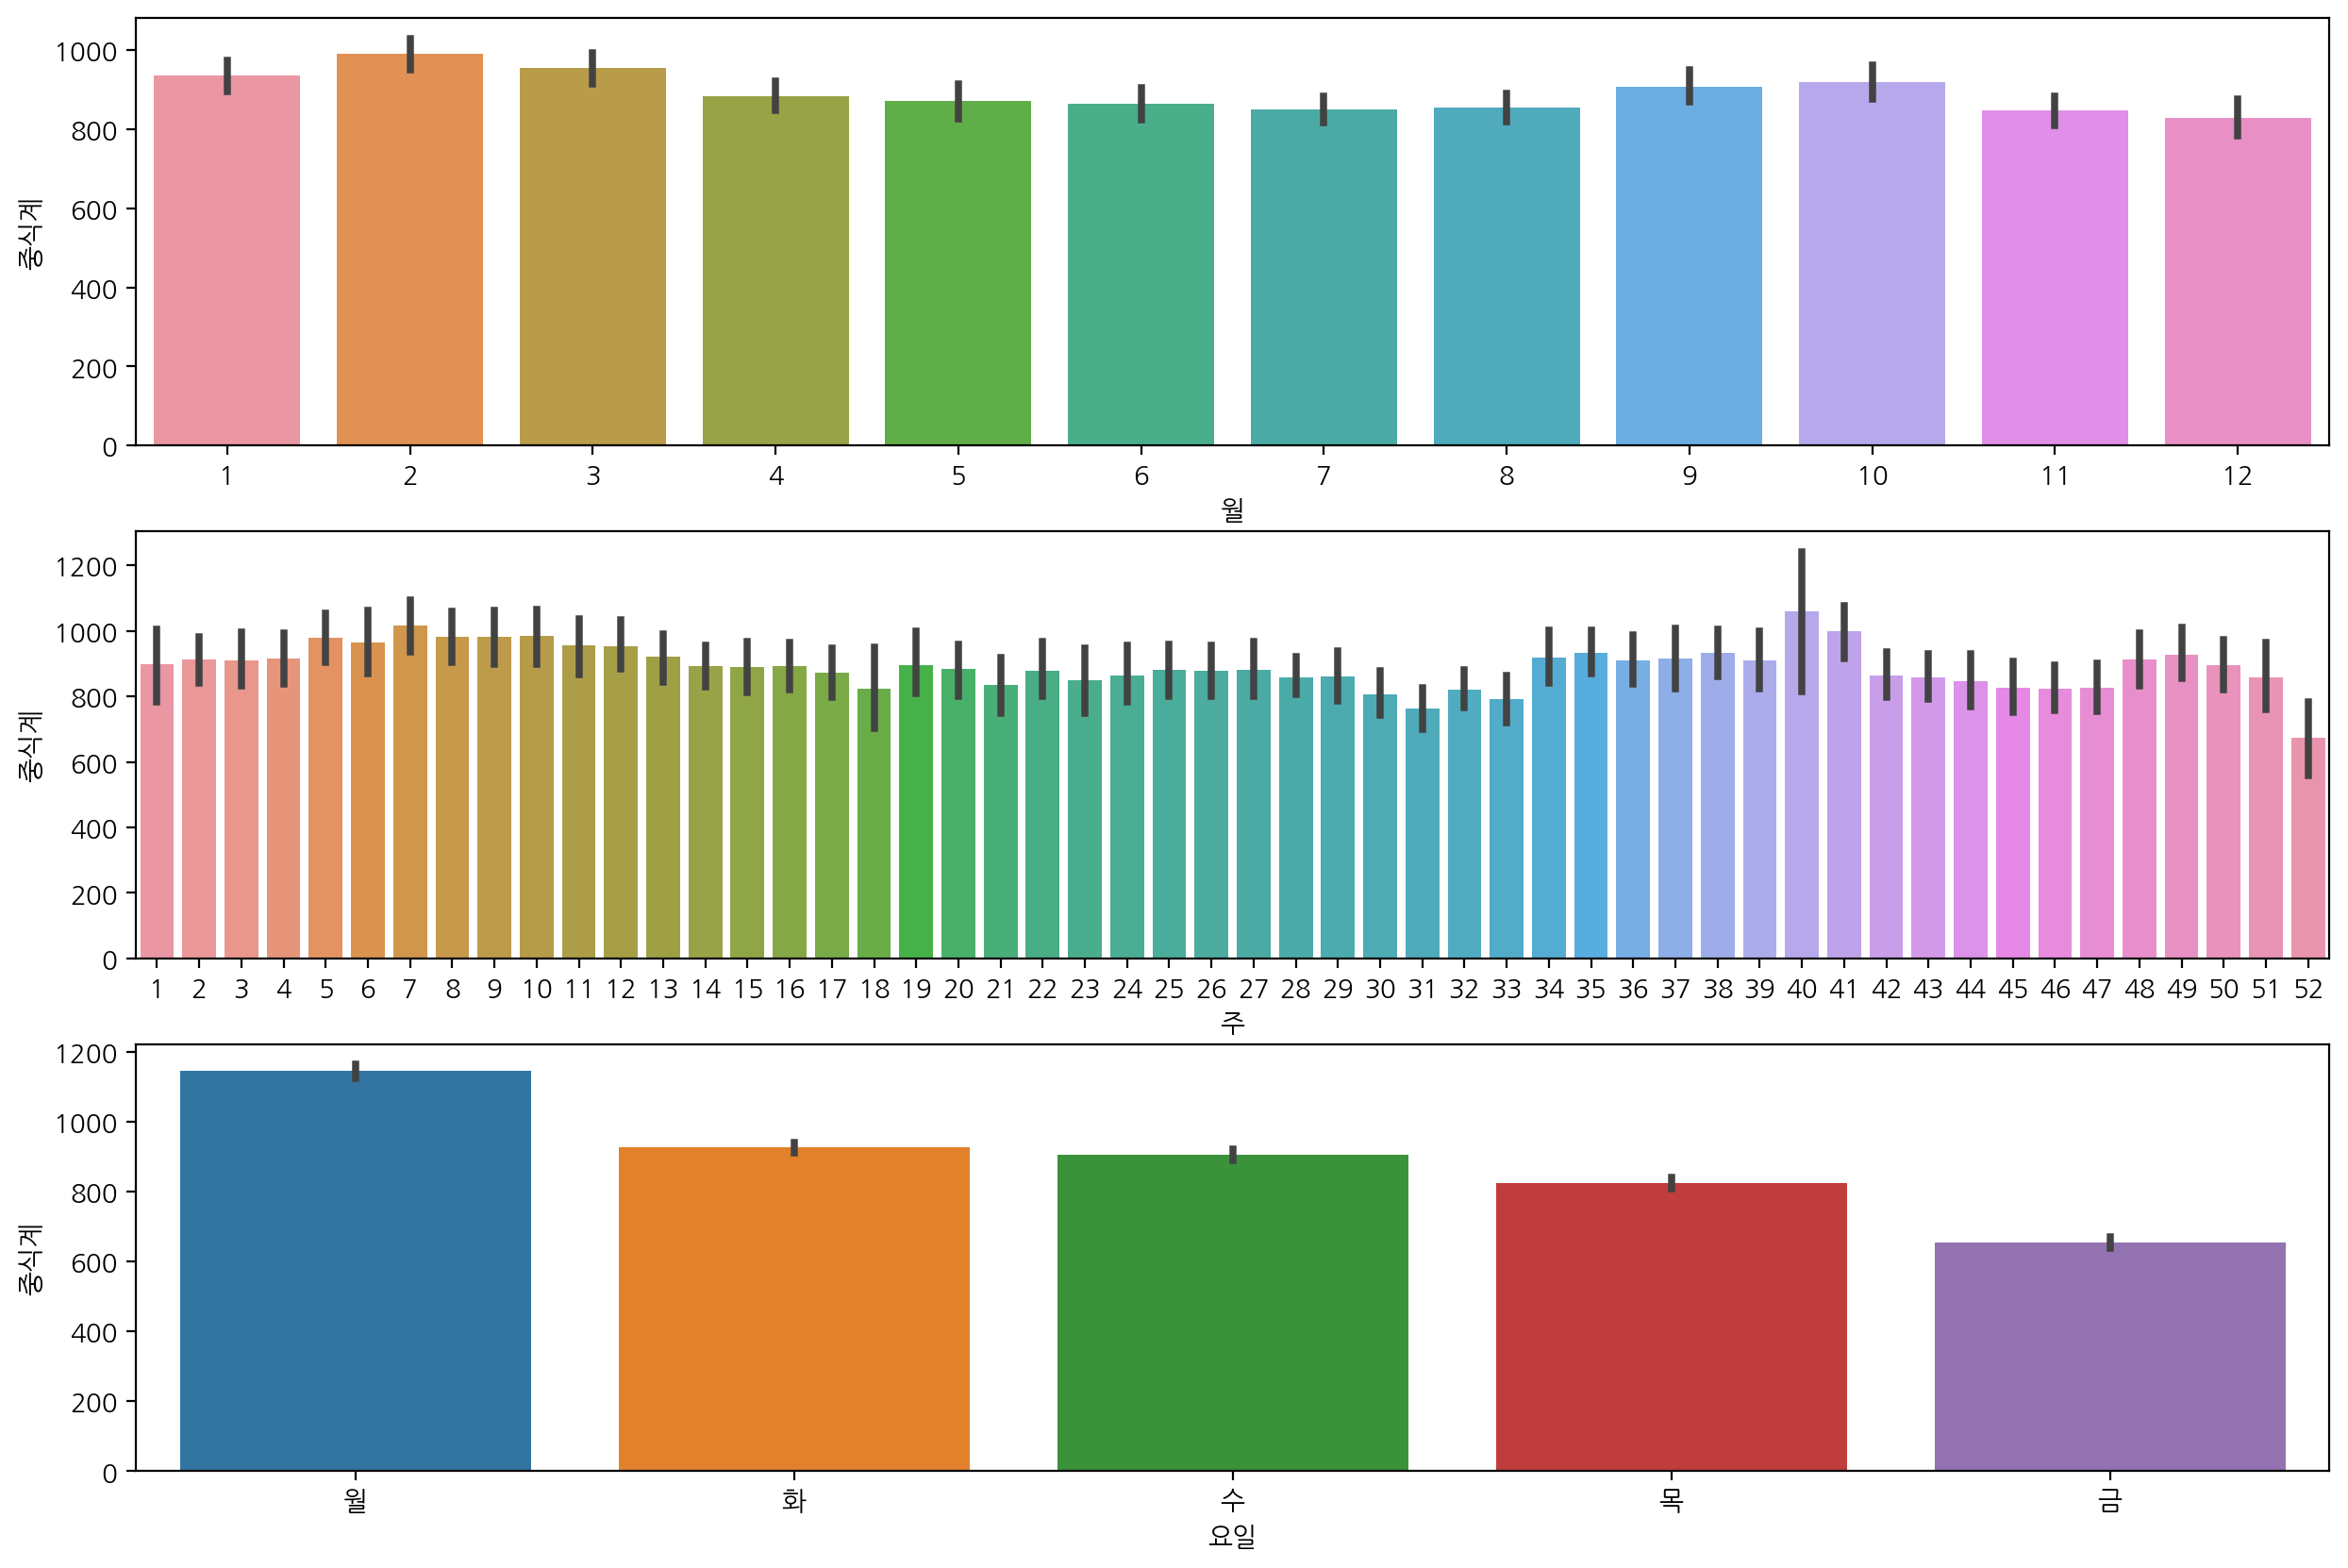

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.barplot(data=train, x=train['월'], y=train['중식계'], ax=axes[0])
sns.barplot(data=train, x=train['주'], y=train['중식계'], ax=axes[1])
sns.barplot(data=train, x=train['요일'], y=train['중식계'], ax=axes[2])
plt.subplots_adjust(hspace=0.2, wspace=0.5)

In [ ]:
#누락된 날짜를 확인해보자 
#모든 평일 데이터 만들기 

import datetime 
import pandas as pd 
start_d = datetime.date(2016,2,1)
end_d = datetime.date(2021,4,9)

dates = pd.date_range(start=start_d, end=end_d, freq='B')
df = pd.DataFrame({'일자':dates})
df.head(3)

,일자
0,2016-02-01
1,2016-02-02
2,2016-02-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355 entries, 0 to 1354
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1355 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 10.7 KB


In [ ]:
df2=pd.concat([train, test], join='outer')
df2.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [ ]:
df2['일자']=pd.to_datetime(df2['일자'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1255 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1255 non-null   datetime64[ns]
 1   요일              1255 non-null   object        
 2   본사정원수           1255 non-null   int64         
 3   본사휴가자수          1255 non-null   int64         
 4   본사출장자수          1255 non-null   int64         
 5   본사시간외근무명령서승인건수  1255 non-null   int64         
 6   현본사소속재택근무자수     1255 non-null   float64       
 7   조식메뉴            1255 non-null   object        
 8   중식메뉴            1255 non-null   object        
 9   석식메뉴            1255 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 127.5+ KB


In [ ]:
merged = pd.merge(df, df2, how='left', on='일자')
merged

SyntaxError: ignored

In [ ]:
null_date = merged_df[pd.isna(merged_df['일자'])]
null_date.to_csv('/content/drive/Shareddrives/네번째_으싸으싸팀/분석중/데이터/결측값.csv')

In [ ]:
null_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 5 to 1354
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            150 non-null    object 
 1   일자              0 non-null      object 
 2   요일              0 non-null      object 
 3   본사정원수           0 non-null      float64
 4   본사휴가자수          0 non-null      float64
 5   본사출장자수          0 non-null      float64
 6   본사시간외근무명령서승인건수  0 non-null      float64
 7   현본사소속재택근무자수     0 non-null      float64
 8   조식메뉴            0 non-null      object 
 9   중식메뉴            0 non-null      object 
 10  석식메뉴            0 non-null      object 
 11  중식계             0 non-null      float64
 12  석식계             0 non-null      float64
dtypes: float64(7), object(6)
memory usage: 16.4+ KB


In [130]:
holiday['일자']=pd.to_datetime(holiday['날짜'])
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      92 non-null     datetime64[ns]
 1   년도      92 non-null     int64         
 2   월       92 non-null     int64         
 3   일       92 non-null     int64         
 4   요일      92 non-null     object        
 5   공휴일     92 non-null     object        
 6   일자      92 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.2+ KB


In [131]:
merged = pd.merge(df2, holiday, how='left', on='일자')
merged

SyntaxError: ignored

In [ ]:
df2['일자']=pd.to_datetime(df2['일자'])
df2.info()

,날짜,년도,월,일,요일,공휴일
0,2016.1.1,2016,1,1,금,신정(양력설)
1,2016.2.7,2016,2,7,일,설날 연휴
2,2016.2.8,2016,2,8,월,설날


In [ ]:
def split_process(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '(' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

In [ ]:
train['조식메뉴_n'] = train['조식메뉴'].apply(split_process)
train['중식메뉴_n'] = train['중식메뉴'].apply(split_process)
train['석식메뉴_n'] = train['석식메뉴'].apply(split_process)
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴_n,중식메뉴_n,석식메뉴_n
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[쌀밥, 찐빵, 우유, 계란후라이, 쥐어채무침, 두유, 포기김치, 호두죽, 주스, ...","[쌀밥, 쇠불고기, 잡곡밥, 청포묵무침, 포기김치, 오징어찌개, 요구르트, 계란찜]","[쌀밥, 두부조림, 육개장, 잡곡밥, 자반고등어구이, 포기김치, 건파래무침]"
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[쌀밥, 시래기조림, 우유, 계란후라이, 호박젓국찌개, 두유, 포기김치, 단호박샌드...","[쌀밥, 잡곡밥, 배추겉절이, 마늘쫑무침, 모둠소세지구이, 김치찌개, 요구르트, 가...","[콩나물밥*양념장, 유산슬, 바나나, 포기김치, 어묵국, 아삭고추무침]"
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[쌀밥, 베이글, 표고버섯죽, 우유, 계란후라이, 콩나물국, 느타리호박볶음, 두유,...","[견과류조림, 쫄면야채무침, 팽이장국, 카레덮밥, 포기김치, 치킨핑거, 요구르트]","[쌀밥, 청국장찌개, 황태양념구이, 잡곡밥, 고기전, 포기김치, 새송이버섯볶음]"


In [ ]:
test.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치


In [ ]:
import pandas as pd

train['일자'] = pd.to_datetime(train['일자'])
train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week

# train['요일'] = train['요일'].map({0:'월', 1:'화', 2:'수', 3:'목', 4:'금'})

train.tail()

<ipython-input-35-b6aeb2c478bc>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['주'] = train['일자'].dt.week


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴_n,중식메뉴_n,석식메뉴_n,년,월,일,주
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,"[크루통크림스프, 양상추샐러드, 흑미밥, 우유, 아귀지리, 계란후라이, 마늘종숙회,...","[쌀밥, 수제함박스테이크, 흑미밥, 단호박물김치, 아욱국, 양상추샐러드*오리엔탈D,...","[겉절이김치, 고들빼기무침, 브로콜리깨소스무침, 김치볶음밥, 계란후라이, 미니쫄우동...",2021,1,20,3
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,"[누룽지탕, 떡국, 양상추샐러드, 흑미밥, 우유, 계란후라이, 해물땡굴소스볶음, 깍...","[쌀밥, 무생채, 양상추샐러드*파인D, 동파육, 청경채, 봄동전, 찰현미밥, 버섯숙...","[흑미밥, 숙주나물당근무침, 삼치양념구이, 포기김치, 쇠고기무국, 비엔나채소볶음]",2021,1,21,3
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,"[두부조림, BLT샌드위치, 흑임자죽, 양상추샐러드, 바지락살국, 흑미밥, 우유, ...","[계란파국, 양상추샐러드*자몽D, 올방개묵무침, 전주비빔밥*약고추장, 포기김치, 파...","[겉절이김치, 유부채소겨자냉채, 갓김치, 흑미밥, 수제비국, 수제맛쵸킹탕수육, 참나...",2021,1,22,3
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,"[누룽지탕, 양상추샐러드, 호박고구마오븐구이, 우유, 흑미밥, 계란후라이, 포기김치...","[양념김, 쌀밥, 흑미밥, 돈육간장불고기, 찰현미밥, 봄동겉절이, 연두부*달래양념장...","[장어강정*데리야끼소스, 열무된장국, 흑미밥, 포기김치, 깻잎쌈*생강채, 오이선]",2021,1,25,4
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0,"[애호박새우젓볶음, 홍합탕, 양상추샐러드, 흑미밥, 우유, 계란후라이, 야채샌드, ...","[쌀밥, 가지고추장무침, 양배추샐러드*사우전D, 교촌간장치킨, 귀리밥, 포기김치, ...","[양파초절임, 수제고기육전, 깍두기, 쑥갓나물, 잔치국수]",2021,1,26,4


In [ ]:
train = train.drop(columns=['중식계', '석식계'], axis=1)